# Logistic Regression

## Part 1 - Data Preprocessing

### Importing the dataset

In [1]:
import pandas as pd     # Importing the Pandas library and assigning it as alias pd to make it easier to reference Pandas functions
dataset = pd.read_csv('adult.csv')      # Reading the given dataset which is in CSV file and loading it into Pandas DataFrame as a variable called 'dataset'

In [2]:
dataset.info()      # Getting the summary of information of the dataset; to determine the no. of columns, no. of non-missing values, and data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [3]:
dataset.head()      # Displays the first n rows of the dataset; for us to inspect the dataset without loading all rows and to verify if it was loaded correctly

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [4]:
# Excluding the columns "education" and "fnlwgt" using drop() method
dataset = dataset.drop(columns=["education", "fnlwgt"])

In [ ]:
# "Now, we perform label encoding to convert categorical columns into numerical.
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

dataset['workclass'] = label_encoder.fit_transform(dataset['workclass'])

dataset['marital.status'] = label_encoder.fit_transform(dataset['marital.status'])

dataset['occupation'] = label_encoder.fit_transform(dataset['occupation'])

dataset['relationship'] = label_encoder.fit_transform(dataset['relationship'])

dataset['race'] = label_encoder.fit_transform(dataset['race'])

dataset['native.country'] = label_encoder.fit_transform(dataset['native.country'])

dataset['income'] = label_encoder.fit_transform(dataset['income'])

dataset['sex'] = label_encoder.fit_transform(dataset['sex'])

# Display the updated dataset
dataset.head(5)

,age,workclass,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,0,9,6,0,1,4,0,0,4356,40,39,0
1,82,4,9,6,4,1,4,0,0,4356,18,39,0
2,66,0,10,6,0,4,2,0,0,4356,40,39,0
3,54,4,4,0,7,4,4,0,0,3900,40,39,0
4,41,4,10,5,10,3,4,0,0,3900,40,39,0


In [6]:
# Transfer the dependent variable "sex" to the last column
sex_column = dataset.pop('sex') 
dataset['sex'] = sex_column 
dataset.head()      # To see the changed positions of the columns

,age,workclass,education.num,marital.status,occupation,relationship,race,capital.gain,capital.loss,hours.per.week,native.country,income,sex
0,90,0,9,6,0,1,4,0,4356,40,39,0,0
1,82,4,9,6,4,1,4,0,4356,18,39,0,0
2,66,0,10,6,0,4,2,0,4356,40,39,0,0
3,54,4,4,0,7,4,4,0,3900,40,39,0,0
4,41,4,10,5,10,3,4,0,3900,40,39,0,0


### Getting the inputs and output

In [7]:
# Selecting the inputs or the independent variable then storing them in 'X' variable
X = dataset.iloc[:,:-1].values      # This code extracts all rows and all columns except the last one from `dataset` and converts them into a NumPy array, storing it in `X`.
X

array([[90,  0,  9, ..., 40, 39,  0],
       [82,  4,  9, ..., 18, 39,  0],
       [66,  0, 10, ..., 40, 39,  0],
       ...,
       [40,  4,  9, ..., 40, 39,  1],
       [58,  4,  9, ..., 40, 39,  0],
       [22,  4,  9, ..., 20, 39,  0]], dtype=int64)

In [8]:
# Selecting the output or the dependent variable then storing them in 'y' variable
y = dataset.iloc[:,-1].values       # This code selects all rows from the last column of `dataset` and converts it into a NumPy array, storing the result in `y`.
y

array([0, 0, 0, ..., 1, 0, 1])

### Creating the Training Set and the Test Set

In [9]:
# Splitting our dataset to create a Training Set and Test Set
from sklearn.model_selection import train_test_split        # Importing the train_test_split function from the sklearn.model_selection module
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)      #Randomly splitting the dataset into training and test sets, with 80% of the data used for training (X_train, y_train) and 20% used for testing (X_test, y_test)

In [10]:
X_train

array([[41,  4, 10, ..., 51, 39,  0],
       [25,  2, 13, ..., 25, 39,  0],
       [25,  4,  9, ..., 40, 39,  0],
       ...,
       [26,  4,  8, ..., 51, 39,  0],
       [44,  4, 14, ..., 40, 39,  1],
       [39,  4,  9, ..., 40, 39,  1]], dtype=int64)

In [11]:
X_test

array([[56,  4,  5, ..., 40, 39,  0],
       [19,  4,  9, ..., 25, 39,  0],
       [23,  4, 10, ..., 35, 40,  0],
       ...,
       [31,  4, 11, ..., 40, 39,  0],
       [41,  4,  6, ..., 40, 39,  0],
       [37,  4, 13, ..., 40, 39,  0]], dtype=int64)

In [12]:
y_train

array([1, 1, 0, ..., 1, 1, 1])

In [13]:
y_test

array([0, 0, 0, ..., 1, 0, 0])

### Balancing and Bagging & Stacking

In [14]:
# Uses SMOTE to generate synthetic samples for the minority class in X_train and y_train, creating balanced training data stored in X_train_resampled and y_train_resampled.
from imblearn.over_sampling import SMOTE        # This line imports SMOTE from imblearn.over_sampling to generate synthetic samples for the minority class and address class imbalance.
smote = SMOTE(k_neighbors=7, random_state=0)       # This line initializes an instance of the SMOTE class with 7 nearest neighbors and a random state of 0 for reproducibility. 
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)        # This line generates synthetic samples using SMOTE, resampling the training data into `X_train_resampled` and `y_train_resampled`.

In [15]:
# Creates a pipeline that applies SMOTE for oversampling the minority class and then trains a RandomForestClassifier, but the last line fits SMOTE separately instead of using the pipeline.

# This part imports `RandomForestClassifier`, `Pipeline`, and `SMOTE` to create a machine learning pipeline that addresses class imbalance.
from sklearn.ensemble import RandomForestClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE

# This part creates a pipeline that applies SMOTE for oversampling and then uses a RandomForestClassifier for training.
pipeline = Pipeline([
    ('smote', SMOTE(random_state=0)),
    ('classifier', RandomForestClassifier())
])

X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)     # This line applies SMOTE to `X_train` and `y_train` to generate synthetic samples, storing the resampled data in `X_train_resampled` and `y_train_resampled`.

### Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler        # Imports the `StandardScaler` class from `sklearn.preprocessing`, which is used to standardize features by removing the mean and scaling to unit variance.
sc = StandardScaler()                                   # This line creates a `StandardScaler` instance to standardize features to a mean of 0 and a standard deviation of 1.
X_train_sc = sc.fit_transform(X_train_resampled)        # Fit the scaler on the data and transform it


In [17]:
X_train_sc

array([[ 0.22247679,  0.14688982, -0.00539457, ...,  0.9455565 ,
         0.28923407, -0.49111951],
       [-0.9458554 , -1.24518346,  1.20779383, ..., -1.17064051,
         0.28923407, -0.49111951],
       [-0.9458554 ,  0.14688982, -0.4097907 , ...,  0.05024238,
         0.28923407, -0.49111951],
       ...,
       [-1.16491768,  0.14688982, -0.00539457, ...,  0.05024238,
         0.28923407, -0.49111951],
       [-1.01887616,  0.14688982,  1.20779383, ..., -1.57760148,
         0.28923407, -0.49111951],
       [-1.09189692,  0.14688982,  1.20779383, ...,  0.05024238,
         0.28923407, -0.49111951]])

## Part 2 - Building and training the model

### Building the model

In [18]:
from sklearn.linear_model import LogisticRegression     # This line imports the `LogisticRegression` class from `sklearn.linear_model`, allowing the use of logistic regression for classification tasks.
model = LogisticRegression(random_state=0)      # This line initializes a `LogisticRegression` model with a random state of 0 for reproducibility.

In [19]:
# Perform hyperparameter tuning with GridSearchCV on a pipeline, optimizing for accuracy using specified parameters and retrieving the best model.

from sklearn.model_selection import GridSearchCV        # This line imports the `GridSearchCV` class from `sklearn.model_selection`, which is used for hyperparameter tuning through cross-validated grid search.

# This code defines `param_grid` for tuning the classifier's `n_estimators`, `max_depth`, and `min_samples_split` hyperparameters.
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, scoring='accuracy', cv=5)      # This line initializes `GridSearchCV` with the pipeline, parameter grid, accuracy as the scoring metric, and 5-fold cross-validation for hyperparameter tuning.
grid_search.fit(X_train_sc, y_train_resampled)      # This line fits the `GridSearchCV` object to the standardized training data and resampled target variable to find the best hyperparameters.

# Retrieve the best model from GridSearchCV
best_model = grid_search.best_estimator_

### Training the model

In [20]:
best_model.fit(X_train_sc, y_train_resampled)     # This line fits the best model obtained from the grid search to the standardized training data and resampled target variable.

Pipeline(steps=[('smote', SMOTE(random_state=0)),
                ('classifier',
                 RandomForestClassifier(max_depth=30, min_samples_split=5,
                                        n_estimators=200))])

### Inference

Making the predictons of the data points in the test set

In [21]:
y_pred = best_model.predict(sc.transform(X_test))    # This line uses the best model to predict the target variable for the standardized test data by transforming `X_test` with the standard scaler.

In [22]:
y_pred

array([0, 1, 0, ..., 1, 1, 0])

Making the prediction of a single data point with:

1. Age = 90
2. Workclass = 0
3. Education number = 9
4. Marital Status = 6
5. Occupation = 0
6. Relationship = 1
7. Race = 4
8. Capital gain = 0
9. Capital loss = 4356
10. Hours per week = 40
11. Native country = 39
12. Income = 0

In [23]:
best_model.predict(sc.transform([[90, 0, 9, 6, 0, 1, 4, 0, 4356, 40, 39, 0]]))

array([0])

## Part 3: Evaluating the model 

### Confusion Matrix

In [24]:
from sklearn.metrics import confusion_matrix          # This code imports the confusion_matrix function from sklearn.metric
cm = confusion_matrix(y_test, y_pred)           # Computes the confusion matrix by comparing the true labels y_test with the predicted labels y_pred                
cm

array([[1899,  328],
       [ 748, 3538]], dtype=int64)

### Accuracy

In [25]:
(1899+3538)/(1899+3538+748+328)         # Checking the accuracy by inputting the numbers obtained from the confusion matrix into the formula for computing accuracy

0.8347919545524336

In [26]:
# Calculates the accuracy of the model by comparing the true labels y_test with the predicted labels y_pred.
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8347919545524336

## Visualizations

### Confusion Matrix

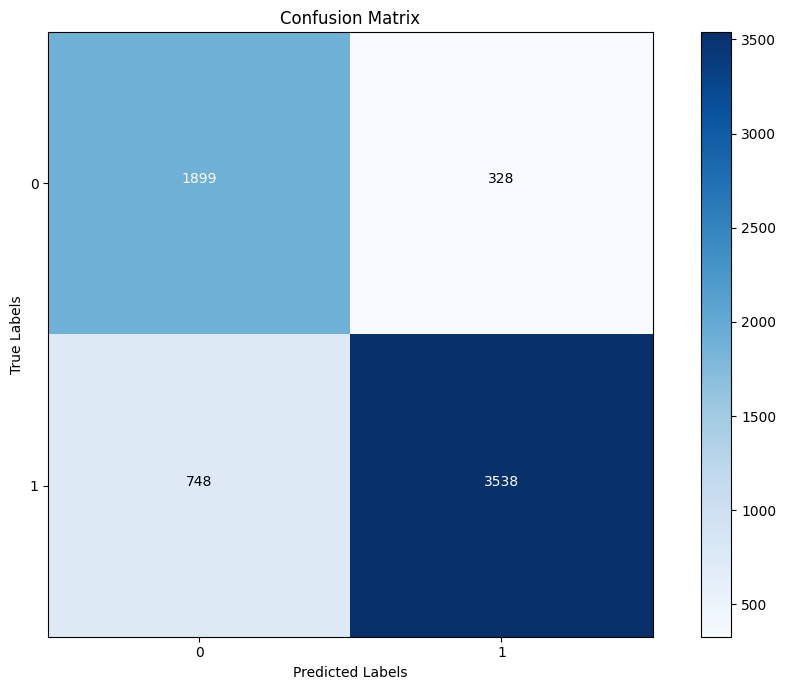

In [ ]:
# Visualizes a classification model's performance by showing counts of true positives, true negatives, false positives, and false negatives, facilitating evaluation of accuracy and other metrics.
import matplotlib.pyplot as plt
import numpy as np

# Create a figure and axis
plt.figure(figsize=(10, 7))

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(np.unique(y)))  # Assuming y has the unique labels
plt.xticks(tick_marks, np.unique(y))
plt.yticks(tick_marks, np.unique(y))

# Labeling the axes
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

# Annotate the cells with numeric values
thresh = cm.max() / 2.  # Threshold for coloring the text
for i, j in np.ndindex(cm.shape):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.show()


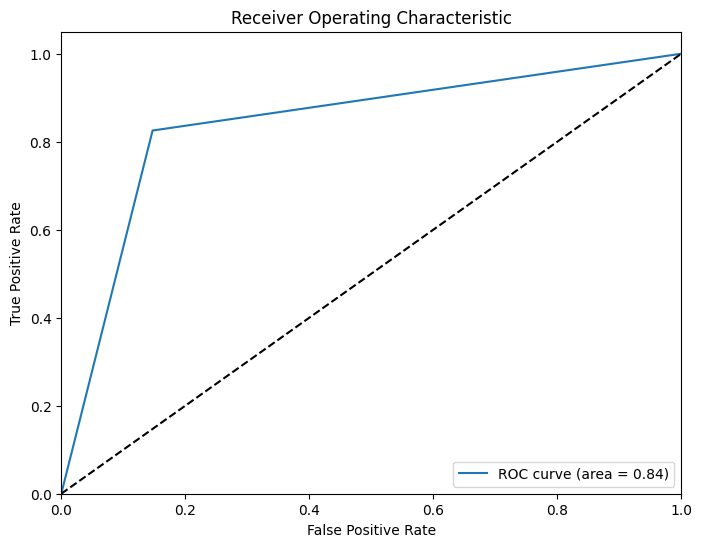

In [ ]:
# The ROC curve visualizes the trade-off between true positive rate and false positive rate across various thresholds, helping assess and optimize binary classification performance.
from sklearn.metrics import roc_curve, roc_auc_score

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

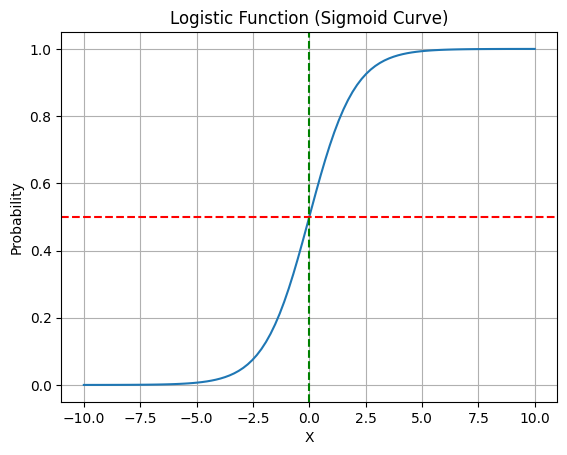

In [ ]:
# Visualizes how input changes affect predicted probabilities in binary outcomes, illustrating the decision boundary and the model's sensitivity.
import numpy as np
import matplotlib.pyplot as plt

# Logistic function
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Generate values
x = np.linspace(-10, 10, 100)
y = logistic(x)

# Plot
plt.plot(x, y)
plt.title('Logistic Function (Sigmoid Curve)')
plt.xlabel('X')
plt.ylabel('Probability')
plt.axhline(0.5, color='red', linestyle='--')  # Decision boundary
plt.axvline(0, color='green', linestyle='--')  # Point where X=0
plt.grid()
plt.show()


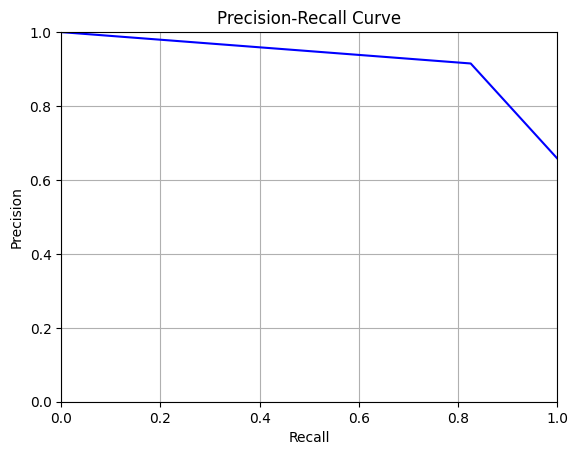

In [ ]:
# Visualizes the trade-off between precision and recall across thresholds, aiding in the assessment of model performance, especially in imbalanced datasets.
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Plot Precision-Recall curve
plt.plot(recall, precision, color='blue')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid()
plt.show()
